<h1 style="
  font-size: 55px; 
  text-align: center; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px rgba(70, 145, 196, 0.84);
  letter-spacing: 2px;
">
  <b>📊 Data Visualization</b>
</h1>
<hr style="width: 60%; border: 2px solid rgba(25, 58, 80, 0.85); border-radius: 5px;">


#### **=> Tasneem Hussein**
---

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Import Libraries</b>?
</h4>


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('merged_data.csv')
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,...,ANNUITY_APPLICATION_RATIO_MIN,ANNUITY_APPLICATION_RATIO_STD,INSTALMENT_CREDIT_RATIO_MEAN,INSTALMENT_CREDIT_RATIO_MAX,INSTALMENT_CREDIT_RATIO_MIN,INSTALMENT_CREDIT_RATIO_STD,CREDIT_3M_TO_LAST_RATIO_MEAN,CREDIT_3M_TO_LAST_RATIO_MAX,CREDIT_3M_TO_LAST_RATIO_MIN,CREDIT_3M_TO_LAST_RATIO_STD
0,100002,1,M,Working,Secondary / secondary special,Labor,1.0,2,2,Business,...,0.051670,NaN,1.340370e-04,1.340370e-04,0.000134,NaN,1.000000e+00,1.000000e+00,1.000000,NaN
1,100003,0,F,Others,Higher education,Admin,2.0,1,1,Education/Health,...,0.097912,5.095915e-02,6.837535e-05,1.763319e-04,0.000012,9.353538e-05,1.328538e+00,1.985615e+00,1.000000,5.690449e-01
2,100004,0,M,Working,Secondary / secondary special,Labor,1.0,2,2,Government,...,0.220626,NaN,1.989456e-04,1.989456e-04,0.000199,NaN,1.000000e+00,1.000000e+00,1.000000,NaN
3,100006,0,F,Working,Secondary / secondary special,Labor,2.0,2,2,Business,...,0.035920,9.532157e+12,3.000000e+09,2.400000e+10,0.000000,8.485281e+09,7.171875e+13,3.375000e+14,0.408468,1.355263e+14
4,100007,0,M,Working,Secondary / secondary special,Admin,1.0,2,2,Other,...,0.057827,2.493514e-02,2.478998e-04,6.841817e-04,0.000056,2.456690e-04,9.694093e-01,1.000000e+00,0.816456,7.493165e-02


<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q13 :What is the relationship between the number of years employed and the decision outcome?</b>
</h4>


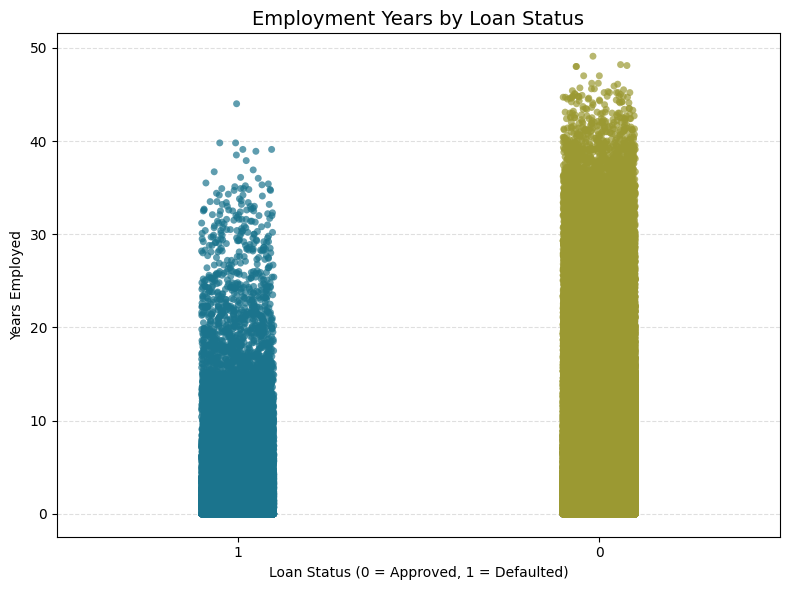

In [15]:
df['TARGET'] = df['TARGET'].astype(str)

plt.figure(figsize=(8,6))
sns.stripplot(
    data=df,
    x='TARGET',
    y='YEARS_EMPLOYED',
    hue='TARGET',
    palette={
        '0': "#9B9932",   # Approved
        '1': (27/255, 116/255, 141/255, 0.84)    # Defaulted
    },
    jitter=True,
    alpha=0.7,
    size=5,
    legend=False
)

plt.title('Employment Years by Loan Status', fontsize=14)
plt.xlabel('Loan Status (0 = Approved, 1 = Defaulted)')
plt.ylabel('Years Employed')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q14: Does the type of organization affect the likelihood of approval?</b>
</h4>


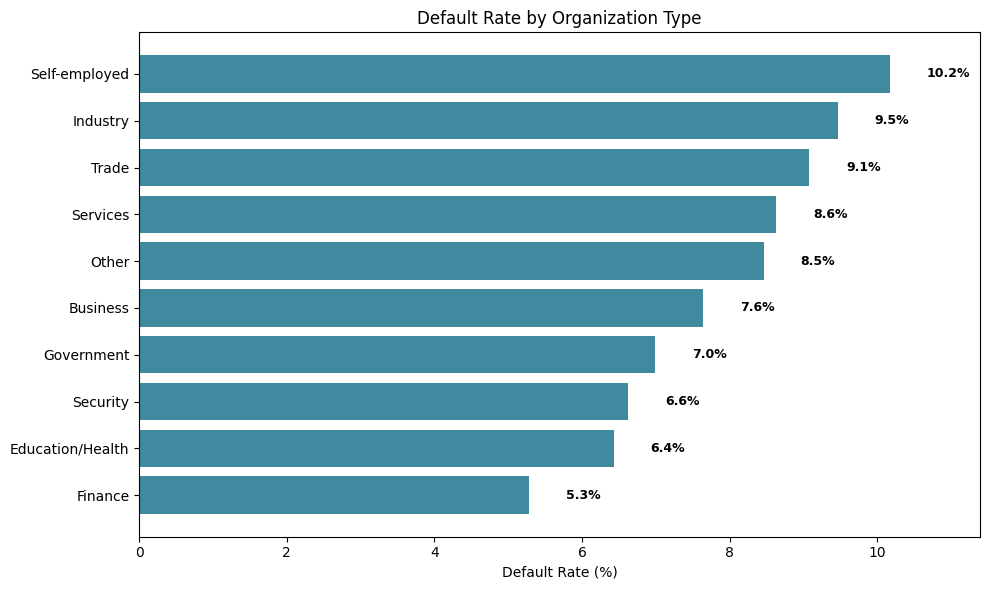

In [16]:
df = df.copy()
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda v: v.decode() if isinstance(v, (bytes, bytearray)) else (str(v) if pd.notna(v) else None))
ct = df.dropna(subset=['ORGANIZATION_TYPE', 'TARGET']).groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count']).reset_index()
ct = ct[ct['count'] >= 5]
ct = ct.sort_values('mean', ascending=False)
x = ct['mean'] * 100
y = ct['ORGANIZATION_TYPE']

plt.figure(figsize=(10,6))
bars = plt.barh(y, x, color=(27/255, 116/255, 141/255, 0.84))
plt.gca().invert_yaxis()
for i, v in enumerate(x):
    plt.text(v + max(0.5, x.max()*0.01), i, f"{v:.1f}%", va='center', fontsize=9, weight='bold', color='black')
plt.xlabel('Default Rate (%)')
plt.title('Default Rate by Organization Type')
plt.xlim(0, max(10, x.max() * 1.12))
plt.tight_layout()
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q15: Do clients who recently changed jobs face higher rejection rates?</b>
</h4>

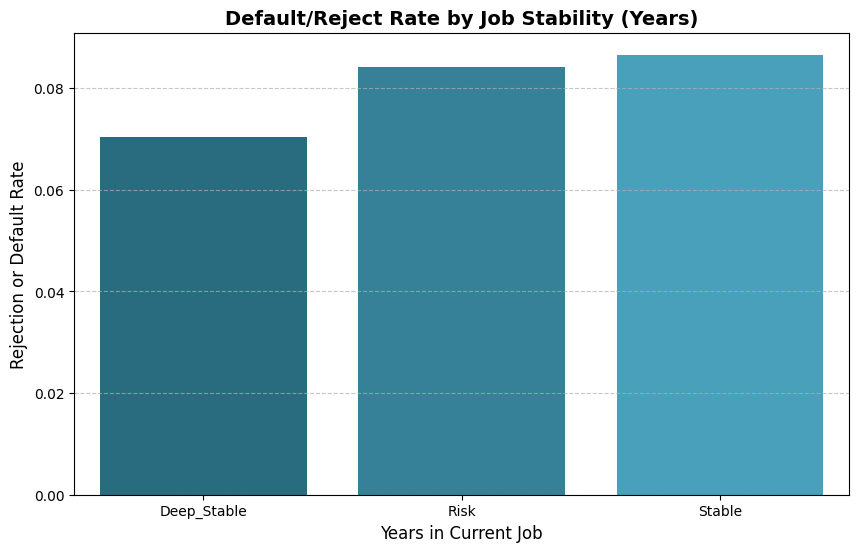

In [17]:
base_color = np.array([27/255, 116/255, 141/255, 0.84])  
lighter_color = np.array([53/255, 170/255, 206/255, 0.84]) 

num_bars = df['STABILITY_YEARS'].nunique()

palette = [
    tuple(base_color + (lighter_color - base_color) * (i / max(1, num_bars - 1)) ** 1.3)
    for i in range(num_bars)
]

stability_default = df.groupby('STABILITY_YEARS')['TARGET'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='STABILITY_YEARS',
    y='TARGET',
    data=stability_default,
    hue='STABILITY_YEARS',
    palette=palette,
    dodge=False,
    legend=False
)

plt.title('Default/Reject Rate by Job Stability (Years)', fontsize=14, fontweight='bold')
plt.xlabel('Years in Current Job', fontsize=12)
plt.ylabel('Rejection or Default Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q16: Does the number of credit bureau inquiries in the last year affect the approval rate?</b>
</h4>

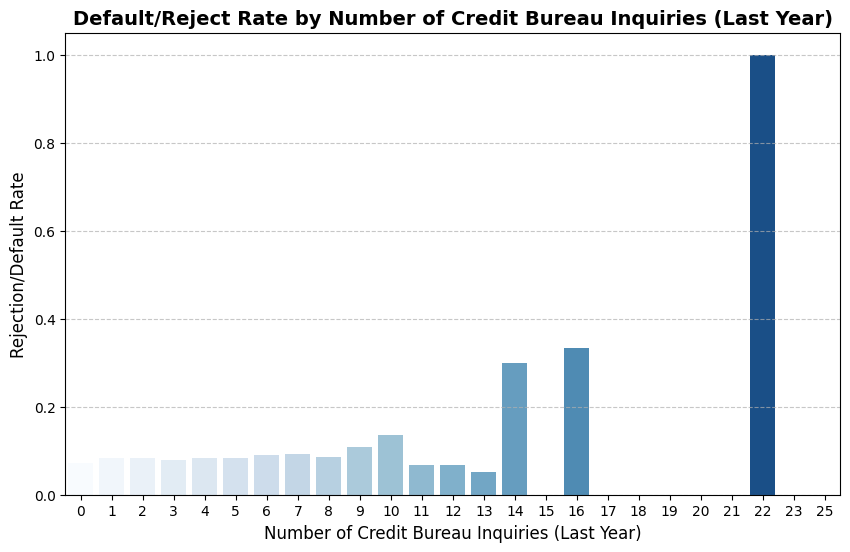

In [18]:
inquiry_default = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].mean().reset_index()
inquiry_default = inquiry_default.sort_values('AMT_REQ_CREDIT_BUREAU_YEAR')

plt.figure(figsize=(10,6))
sns.barplot(
    x='AMT_REQ_CREDIT_BUREAU_YEAR',
    y='TARGET',
    data=inquiry_default,
    hue='AMT_REQ_CREDIT_BUREAU_YEAR',
    palette='Blues',
    dodge=False,
    legend=False
)

plt.title('Default/Reject Rate by Number of Credit Bureau Inquiries (Last Year)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Credit Bureau Inquiries (Last Year)', fontsize=12)
plt.ylabel('Rejection/Default Rate', fontsize=12)

plt.xticks(
    ticks=range(len(inquiry_default)),
    labels=inquiry_default['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int),
    rotation=0
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
